In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Data Preparation

# Dataframe "folder/filename.csv"
driving_dupes=pd.read_csv("datasets/ROA05.20230506T170530.csv")

# Drop Duplicates
driving= driving_dupes.drop_duplicates()

# Fills missing values with mean of column
driving.fillna(driving.mean(), inplace=True)

In [37]:
# First 10 lines (Starting from 0 to 9)
driving.head(10)

,Statistic Label,Year,State,UNIT,VALUE
0,Number of Applications Received,2005,State,Number,177216.0
1,Number of Applications Received,2006,State,Number,216880.0
2,Number of Applications Received,2007,State,Number,290678.0
3,Number of Applications Received,2008,State,Number,362163.0
4,Number of Applications Received,2009,State,Number,144670.0
5,Number of Applications Received,2010,State,Number,154166.0
6,Number of Applications Received,2011,State,Number,147108.0
7,Number of Applications Received,2012,State,Number,141309.0
8,Number of Applications Received,2013,State,Number,139381.0
9,Number of Applications Received,2014,State,Number,152078.0


In [38]:
# Bottom 10 rows in dataset
driving.tail(10)

,Statistic Label,Year,State,UNIT,VALUE
109,Number of Testers Employed at End of Year,2012,State,Number,114.0
110,Number of Testers Employed at End of Year,2013,State,Number,103.7
111,Number of Testers Employed at End of Year,2014,State,Number,97.2
112,Number of Testers Employed at End of Year,2015,State,Number,92.2
113,Number of Testers Employed at End of Year,2016,State,Number,92.4
114,Number of Testers Employed at End of Year,2017,State,Number,103.4
115,Number of Testers Employed at End of Year,2018,State,Number,137.2
116,Number of Testers Employed at End of Year,2019,State,Number,145.0
117,Number of Testers Employed at End of Year,2020,State,Number,136.0
118,Number of Testers Employed at End of Year,2021,State,Number,164.0


In [34]:
# General information including datatype and null counts
driving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  119 non-null    object 
 1   Year             119 non-null    int64  
 2   State            119 non-null    object 
 3   UNIT             119 non-null    object 
 4   VALUE            118 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ KB


In [6]:
# Extra information around values
driving.describe()

,Year,VALUE
count,119.000000,118.000000
mean,2013.000000,58603.675169
std,4.919694,80085.549140
min,2005.000000,5.500000
25%,2009.000000,55.042500
50%,2013.000000,20614.000000
75%,2017.000000,124846.750000
max,2021.000000,388366.000000


In [7]:
# Check max lengths of columns
def max_lens(driving):
    lens = []
    for x in driving.columns:
        sublen = []
        for i, row, in driving.iterrows():
            sublen.append(len(str(row[x])))
        lens.append(max(sublen))
    return lens

In [8]:
max_lens(driving)

[44, 4, 5, 6, 8]

In [13]:
# Filter to Average Pass Rate
filtered_avgpass = driving[driving['Statistic Label'] == 'Average Pass Rate']

Text(0.5, 1.0, 'Percentage of Average Pass Rate over time')

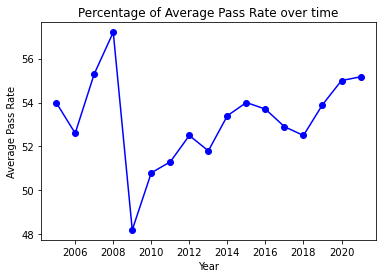

In [14]:
# Create plot to show average pass rate over time
plt.plot(filtered_avgpass['Year'], filtered_avgpass['VALUE'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Pass Rate')
plt.title('Percentage of Average Pass Rate over time')

In [17]:
# Filter to Driving tests conducted and number of applications received
filtered_dt_numtests= driving[(driving['Statistic Label'] == 'Driving Tests Conducted') | (driving['Statistic Label'] == 'Number of Applications Received')]

In [18]:
# Pivot filtered dataframe
pivot_driving = filtered_dt_numtests.pivot(index='Year', columns='Statistic Label', values='VALUE')

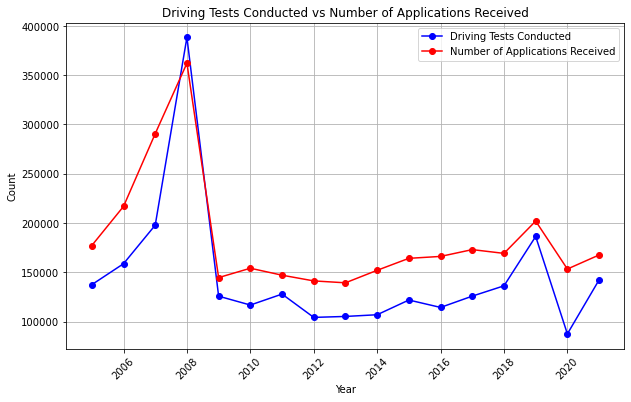

In [19]:
# Plot Driving tests and number of applications received over time
plt.figure(figsize=(10, 6))
plt.plot(pivot_driving.index, pivot_driving['Driving Tests Conducted'], marker='o', linestyle='-', color='b', label='Driving Tests Conducted')
plt.plot(pivot_driving.index, pivot_driving['Number of Applications Received'], marker='o', linestyle='-', color='r', label='Number of Applications Received')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Driving Tests Conducted vs Number of Applications Received')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [56]:
# Second Dataframe
theory_dupes=pd.read_csv("datasets/ROA08.20230516T150528.csv")

# Drop Duplicates
theory= theory_dupes.drop_duplicates()

# Fills missing values with mean of column
theory.fillna(theory.mean(), inplace=True)

In [57]:
# First 10 lines (Starting from 0 to 9)
theory.head(10)

,Statistic Label,Year,State,UNIT,VALUE
0,Tests Conducted,2002,State,Number,101428.0
1,Tests Conducted,2003,State,Number,118425.0
2,Tests Conducted,2004,State,Number,137016.0
3,Tests Conducted,2005,State,Number,157269.0
4,Tests Conducted,2006,State,Number,157846.0
5,Tests Conducted,2007,State,Number,169600.0
6,Tests Conducted,2008,State,Number,154166.0
7,Tests Conducted,2009,State,Number,132893.0
8,Tests Conducted,2010,State,Number,130159.0
9,Tests Conducted,2011,State,Number,110185.0


In [65]:
#Information on 'theory' DataFrame
theory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  40 non-null     object 
 1   Year             40 non-null     int64  
 2   State            40 non-null     object 
 3   UNIT             40 non-null     object 
 4   VALUE            40 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ KB


In [58]:
# Merging the Dataframes by 'Year' and 'State'
merged_df = pd.merge(driving, theory, on=['Year', 'State'], suffixes=('_driving', '_theory'), how='inner')

In [59]:
print(merged_df)

                          Statistic Label_driving  Year  State UNIT_driving  \
0                 Number of Applications Received  2005  State       Number   
1                 Number of Applications Received  2005  State       Number   
2                         Driving Tests Conducted  2005  State       Number   
3                         Driving Tests Conducted  2005  State       Number   
4        Applicant Did Not Attend for Appointment  2005  State       Number   
..                                            ...   ...    ...          ...   
233  Average Waiting Time for Test at End of Year  2021  State        Weeks   
234                             Average Pass Rate  2021  State            %   
235                             Average Pass Rate  2021  State            %   
236     Number of Testers Employed at End of Year  2021  State       Number   
237     Number of Testers Employed at End of Year  2021  State       Number   

     VALUE_driving Statistic Label_theory UNIT_theo

In [60]:
# First 10 lines (Starting from 0 to 9)
merged_df.head(10)

,Statistic Label_driving,Year,State,UNIT_driving,VALUE_driving,Statistic Label_theory,UNIT_theory,VALUE_theory
0,Number of Applications Received,2005,State,Number,177216.0,Tests Conducted,Number,157269.0
1,Number of Applications Received,2005,State,Number,177216.0,Percentage Pass Rate,%,81.6
2,Driving Tests Conducted,2005,State,Number,137500.0,Tests Conducted,Number,157269.0
3,Driving Tests Conducted,2005,State,Number,137500.0,Percentage Pass Rate,%,81.6
4,Applicant Did Not Attend for Appointment,2005,State,Number,22620.0,Tests Conducted,Number,157269.0
5,Applicant Did Not Attend for Appointment,2005,State,Number,22620.0,Percentage Pass Rate,%,81.6
6,Number on Waiting List at End of Year,2005,State,Number,126561.0,Tests Conducted,Number,157269.0
7,Number on Waiting List at End of Year,2005,State,Number,126561.0,Percentage Pass Rate,%,81.6
8,Average Waiting Time for Test at End of Year,2005,State,Weeks,32.8,Tests Conducted,Number,157269.0
9,Average Waiting Time for Test at End of Year,2005,State,Weeks,32.8,Percentage Pass Rate,%,81.6


In [61]:
# Filter merged dataframe to only include the pass rate data
pass_rate_df = merged_df[merged_df['Statistic Label_driving'] == 'Average Pass Rate']
percentage_pass_rate_df = merged_df[merged_df['Statistic Label_theory'] == 'Percentage Pass Rate']

In [62]:
#Sort dataframes by year
pass_rate_df = pass_rate_df.sort_values('Year')
percentage_pass_rate_df = percentage_pass_rate_df.sort_values('Year')

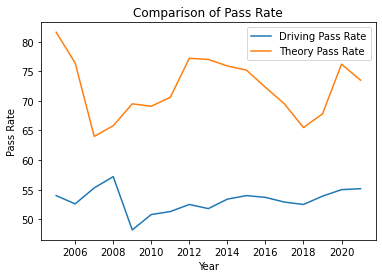

In [63]:
# Create the line plot, labels, title and legend
plt.plot(pass_rate_df['Year'], pass_rate_df['VALUE_driving'], label='Driving Pass Rate')
plt.plot(percentage_pass_rate_df['Year'], percentage_pass_rate_df['VALUE_theory'], label='Theory Pass Rate')
plt.xlabel('Year')
plt.ylabel('Pass Rate')
plt.title('Comparison of Pass Rate')
plt.legend()
plt.show()

In [64]:
# Calculating the mean number of applications received between 2015 and 2021


#Filter Dataframe to only 'Number of Applications Received'
applications_driving = driving[driving['Statistic Label'] == 'Number of Applications Received']


#Filter Datafram to only years 2015 to 2021
filtered_driving_2 = applications_driving[(applications_driving['Year'] >= 2015) & (applications_driving['Year'] <= 2021)]

# Values
values = filtered_driving_2['VALUE']
values_array = np.array(values)
mean_applications_received = np.mean(values_array)

print("Mean applications received between 2015 and 2021=", mean_applications_received)


Mean applications received between 2015 and 2021= 170800.7142857143
